<a href="https://colab.research.google.com/github/DanyunHe/MIT6.036/blob/master/MIT6_036_hw08_colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MIT 6.036 Spring 2019: Homework 8#

This colab notebook provides code and a framework for [homework 8](https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Spring/courseware/Week8/week8_homework/).  You can work out your solutions here, then submit your results back on the homework page when ready.

## <section>**Setup**</section>

First, download the code distribution for this homework that contains test cases and helper functions.

Run the next code block to download and import the code for this lab.


In [3]:
!rm -rf code_for_hw8* __MACOSX data .DS_Store
!wget --quiet https://introml.odl.mit.edu/cat-soop/_static/6.036/homework/hw08/code_for_hw8.zip
!unzip code_for_hw8.zip
!mv code_for_hw8/* .

from code_for_hw8_oop import *
import numpy as np
import math as m

Archive:  code_for_hw8.zip
   creating: code_for_hw8/
  inflating: code_for_hw8/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/code_for_hw8/
  inflating: __MACOSX/code_for_hw8/._.DS_Store  
  inflating: code_for_hw8/code_for_hw8_oop.py  
  inflating: __MACOSX/code_for_hw8/._code_for_hw8_oop.py  
   creating: code_for_hw8/data/
  inflating: code_for_hw8/data/data3_train.csv  
   creating: __MACOSX/code_for_hw8/data/
  inflating: __MACOSX/code_for_hw8/data/._data3_train.csv  
  inflating: code_for_hw8/data/data4_train.csv  
  inflating: code_for_hw8/data/data4_validate.csv  
  inflating: code_for_hw8/data/data3_validate.csv  
  inflating: code_for_hw8/data/dataXor_train.csv  
  inflating: code_for_hw8/data/data2_train.csv  
  inflating: code_for_hw8/data/data2_validate.csv  
  inflating: code_for_hw8/data/data3class_train.csv  
  inflating: code_for_hw8/data/data1_validate.csv  
  inflating: code_for_hw8/data/data1_train.csv  
  inflating: code_for_hw8/code_for_hw8_keras.py  
 

# 1) Batch Normalization
No code involved,  <a href="https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Spring/courseware/Week8/week8_homework/">Refer to Catsoop.</a>

# 2) Implementing Mini-batch Gradient Descent and Batch Normalization (OPTIONAL)

** Note: You can click the arrow on the left of this text block to collapse/expand this optional section and all its code blocks **

Last week we implemented a framework for building neural networks from scratch. We trained our models using *stochastic* gradient descent. In this problem, we explore how we can implement batch normalization as a module `BatchNorm` in our framework. It is the same module which you analyzed in problem 1. 

Key to the concept of batch normalization is the doing gradient descent on batches of data. So we instead of using last week's stochastic gradient descent, we will first implement the *mini-batch* gradient descent method `mini_gd`, which is a hybrid between *stochastic* gradient descent and *batch* gradient descent. The lecture notes on <a href="https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Spring/courseware/Week7/neural_networks_2/1?activate_block_id=block-v1%3AMITx%2B6.036%2B2019_Spring%2Btype%40vertical%2Bblock%40neural_networks_2_optimizing_neural_network_parameters_vert"> optimizing neural network parameters</a> are helpful for this part.

In *mini-batch* gradient descent, for a mini-batch of size $K$, we select $K$ distinct data points uniformly at random from the data set and update the network weights based only on their contributions to the gradient:
$$W := W - \eta\sum_{i=1}^K \nabla_W \mathcal{L}(h(x^{(i)}; W), y^{(i)})\;\;.$$

Our *mini-batch* method `mini_gd` will be implemented within the `Sequential` python class (see homework 7 problem 2) and will take the following as inputs:

* `X`: a standard data array (d by n)
* `y`: a standard labels row vector (1 by n)
* `iters`: the number of updates to perform on weights $W$
* `lrate`: the learning rate used
* `K`: the mini-batch size to be used

One call of `mini_gd` should call `Sequential.backward` for back-propagation and `Sequential.step` for updating the weights, for a total of `iters` times, using `lrate` as the learning rate. As in our implementation of `sgd` from homework 7, we compute the predicted output for a mini-batch of data with the `Sequential.forward` method. We compute the loss between our predictions and the true labels using the assigned `Sequential.loss` method. (Note that in homework 7, `Sequential.step` was called `Sequential.sgd_step`. While the functionality of the step function is the same, it has been renamed for convenience. The same is true for the `module.step` function of each module we implemented, where applicable.)

For picking $K$ unique data points at random from our large data-set for each mini-batch, we will implement the following strategy: we will first shuffle our data points `X` (and associated labels `y`). Then, we get <math>\frac{n}{k}</math> (rounded down to the nearest integer) different mini-batches by grouping each $K$ consecutive points from this shuffled array. If we end up iterating over all the points but need more mini-batches, we will repeat the shuffling and the batching process.

<b>2A)</b>You need to fill in the missing code below. We have implemented the shuffling of indices and have provided you with the outer and inner loops.

** This OPTIONAL problem has you extend your homework 7 implementation for building neural networks. **
### PLEASE COPY IN YOUR CODE FROM HOMEWORK 7 TO COMPLEMENT THE CLASSES GIVEN HERE

Recall that your implementation from homework 7 included the following classes:
    
  * Module
  * Linear 
  * Tanh 
  * ReLU 
  * SoftMax
  * NLL
  * Sequential

In [0]:
import math as m 

class Sequential:
    def __init__(self, modules, loss):            
        self.modules = modules
        self.loss = loss

    def mini_gd(self, X, Y, iters, lrate, notif_each=None, K=10):
        D, N = X.shape

        np.random.seed(0)
        num_updates = 0
        indices = np.arange(N)
        while num_updates < iters:

            np.random.shuffle(indices)
            X = None  # Your code
            Y = None  # Your code

            for j in range(m.floor(N/K)):
                if num_updates >= iters: break

                # Implement the main part of mini_gd here
                # Your code
                
                num_updates += 1

    def forward(self, Xt):                        
        for m in self.modules: Xt = m.forward(Xt)
        return Xt

    def backward(self, delta):                   
        for m in self.modules[::-1]: delta = m.backward(delta)

    def step(self, lrate):    
        for m in self.modules: m.step(lrate)

<b>2B)</b> We are now ready to implement batch normalization into our neural network framework! Our module `BatchNorm` will sit between consecutive layers of neurons, such as the $l^{th}$ and $(l+1)^{th}$ layers, acting as a "corrector" which allows $W^l$ to change freely, producing outputs $z^l$, but then the module corrects the covariate shift induced in the signals before they reach the $(l+1)^{th}$ layer, converting $z^l$ to $\widehat{Z}^l$. 

The following is a summmary what is described in the <a href="https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Spring/courseware/Week7/neural_networks_2/2">lecture notes</a>, and it should guide your implementation of the module. 

Any normalization between the $l^{th}$ and $(l+1)^{th}$ layers is done *separately* for each of the $n^l$ input connections leading to the $(l+1)^{th}$ layer. We handle a mini-batch of data of size $K$, and $Z^l$ is $n^l \times K$, and the output $\widehat{Z}^l$is of the same shape. 

We first compute $n^l$ *batchwise* means and
standard deviations.  Let $\mu^l$ be the $n^l \times 1$ vector (`self.mus`) where
$$\mu^l_i = \frac{1}{K} \sum_{j = 1}^K Z^l_{ij}\;\;,$$
and let $\sigma^l$ be the $n^l \times 1$ vector (`self.vars`) where 
$$\sigma^l_i = \sqrt{\frac{1}{K} \sum_{j = 1}^K (Z^l_{ij} - \mu_i)^2}\;\;.$$

The normalized data `self.norm` is the matrix $\overline{Z}$, where
$$\overline{Z}^l_{ij} = \frac{Z^l_{ij} - \mu^l_i}{\sigma^l_i + \epsilon}\;\;,$$
and where $\epsilon$ is a very small constant to guard against division by
zero. 

We define weights $G^l$ (`self.G`) and $B^l$ (`self.B`), each being an $n^l \times 1$ vector, which we use to to shift and scale the outputs:
$$\widehat{Z}^l_{ij} = G^l_i \overline{Z}^l_{ij} + B^l_i\;\;.$$

The outputs are finally ready to be passed to the $(l+1)^{th}$ layer.

A slight warning (that we will not worry about here) about `BatchNorm` is that during the *test* phase, if the test mini-batch size is too small (imagine we are deploying a neural network that deals with live video frames), then the lack of samples would cause the freshly-calculated $\mu^l$ and $\sigma^l$ to be far off from their true values that the module's parameters $G^l$ and $B^l$ were trained to be compatible with. To fix that, people usually compute a running average of $\mu^l$ and $\sigma^l$ during training, to be used at test time. We will assume our test mini-batches are large enough.

In this problem we only implement the `BatchNorm.forward` and `BatchNorm.step` methods. We provide you with the implementation for `BatchNorm.backward` and the lecture notes contain the details of the derivations. You will need to fill in the missing code below.

In [0]:
class BatchNorm(Module):    
    def __init__(self, m):
        np.random.seed(0)
        self.eps = 1e-20
        self.m = m  # number of input channels
        
        # Init learned shifts and scaling factors
        self.B = np.zeros([self.m, 1])
        self.G = np.random.normal(0, 1.0 * self.m ** (-.5), [self.m, 1])
        
    # Works on m x b matrices of m input channels and b different inputs
    def forward(self, A):# A is m x K: m input channels and mini-batch size K
        # Store last inputs and K for next backward() call
        self.A = A
        self.K = A.shape[1]
        
        self.mus = None  # Your Code
        self.vars = None  # Your Code

        # Normalize inputs using their mean and standard deviation
        self.norm = None  # Your Code
            
        # Return scaled and shifted versions of self.norm
        return None  # Your Code

    def backward(self, dLdZ):
        # Re-usable constants
        std_inv = 1/np.sqrt(self.vars+self.eps)
        A_min_mu = self.A-self.mus
        
        dLdnorm = dLdZ * self.G
        dLdVar = np.sum(dLdnorm * A_min_mu * -0.5 * std_inv**3, axis=1, keepdims=True)
        dLdMu = np.sum(dLdnorm*(-std_inv), axis=1, keepdims=True) + dLdVar * (-2/self.K) * np.sum(A_min_mu, axis=1, keepdims=True)
        dLdX = (dLdnorm * std_inv) + (dLdVar * (2/self.K) * A_min_mu) + (dLdMu/self.K)
        
        self.dLdB = np.sum(dLdZ, axis=1, keepdims=True)
        self.dLdG = np.sum(dLdZ * self.norm, axis=1, keepdims=True)
        return dLdX

    def step(self, lrate):
        self.B = None  # Your Code
        self.G = None  # Your Code
        return

# 3) 2D Datasets

For the 2D datasets, we have provided the following function:


```
run_keras_2d(data_name, layers, epochs, split=0.25, display=True, trials=5)
```


where:

data_name is a string, such as '1', '2', etc.
layers is a list of Keras layer definitions for a Sequential model, e.g. 
```
[Dense(input_dim=2, units=10, activation='relu'), Dense(units=2, activation='softmax')]
```

epochs is an integer indicating how many times to go through the data in training
split is a fraction of the training data to use for validation if a validation set is not defined
display whether to display result plots
verbose whether to print loss and accuracy (percent correctly labeled) each epoch
trials is an integer indicating how many times to perform the training and testing
2D Data
The two-class datasets have data_names: '1','2','3','4'. Target accuracies (percent correct) on the validation set are (99%, 90.5%, 96%, 94%).

In this problem, try the following 5 architectures, specified by the number of units in the hidden layers:

1: (0), 2: (10), 3: (100), 4: (10, 10), 5: (100, 100))
You may find the archs function in the code file to be helpful here.
Some of these questions ask for the "simplest" architecture; the list above is ordered starting with the simplest.

In [4]:
from code_for_hw8_keras import *
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.layers import Conv1D, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import Callback
from keras.datasets import mnist
from keras import backend as K
from keras.initializers import VarianceScaling
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [9]:
#example of run_keras_2d
run_keras_2d("2", archs(2)[3], 10, split=0.25, display=False, verbose=False, trials=5)




Keras FC: dataset= 2
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (200, 2) y (200,) classes {0.0, 1.0}

Loss on validation set:0.2637147865210329 Accuracy on validation set: 0.895

Loss on validation set:0.2847880501925997 Accuracy on validation set: 0.885

Loss on validation set:0.26968979200359655 Accuracy on validation set: 0.885

Loss on validation set:0.3039260469599271 Accuracy on validation set: 0.885

Loss on validation set:0.27983292571080975 Accuracy on validation set: 0.89

Avg. validation accuracy:0.8879999999999999


(array([[-2.01380386e-01,  3.89440035e-02],
        [ 1.29983966e+00,  6.79588882e-01],
        [ 6.71250029e-01,  1.28652238e+00],
        [ 2.10673747e+00, -9.08443385e-01],
        [-4.42767576e-01, -7.70831748e-01],
        [-6.49323337e-01, -9.85603310e-01],
        [-5.05832862e-02,  1.57840839e+00],
        [ 5.26712401e-01, -1.23759149e+00],
        [ 1.08681935e+00,  9.30857621e-01],
        [ 1.56463949e+00, -9.08035870e-01],
        [ 3.02060944e+00, -1.20300597e+00],
        [ 1.29690447e+00,  6.12584986e-01],
        [-2.41708091e+00, -2.15882089e+00],
        [ 1.06082281e+00, -1.11885549e+00],
        [-1.11318095e+00,  1.27803332e-01],
        [ 2.19311623e+00,  1.04578246e-01],
        [-9.41722312e-01, -6.40421937e-02],
        [-6.48179440e-01,  1.47403690e+00],
        [ 1.18346748e+00,  8.40906891e-01],
        [ 6.90088182e-01,  3.46665370e+00],
        [ 1.02227645e+00, -9.88603122e-01],
        [-2.88914171e+00, -2.85959001e+00],
        [-1.26191468e+00,  2.518

In [10]:
run_keras_2d("2", archs(2)[4], 10, split=0.25, display=False, verbose=False, trials=5)


Keras FC: dataset= 2
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (200, 2) y (200,) classes {0.0, 1.0}

Loss on validation set:0.21735329518439472 Accuracy on validation set: 0.915

Loss on validation set:0.20132579104017714 Accuracy on validation set: 0.915

Loss on validation set:0.19684233161191883 Accuracy on validation set: 0.925

Loss on validation set:0.2054085673844319 Accuracy on validation set: 0.92

Loss on validation set:0.22211212343669778 Accuracy on validation set: 0.905

Avg. validation accuracy:0.916


(array([[-3.07197403e+00, -3.09217414e+00],
        [-2.26550369e+00, -1.41720255e+00],
        [-9.76365821e-02, -1.94969085e-01],
        [ 1.64799855e-01,  1.43407080e+00],
        [-1.91673335e-01,  1.95463268e+00],
        [ 1.60663203e+00, -1.13067848e+00],
        [ 3.98998700e-01, -8.24673303e-01],
        [ 2.68942514e+00, -7.18395270e-01],
        [-1.30422514e+00, -1.73323671e-01],
        [-4.14619812e-01, -5.21097750e-01],
        [-1.35201342e+00,  5.86232664e-01],
        [ 1.94482126e+00, -1.09518442e+00],
        [ 1.18151883e+00, -1.10309630e+00],
        [ 5.26712401e-01, -1.23759149e+00],
        [-3.07858733e-01, -5.30408365e-02],
        [-1.32852528e+00,  8.72765446e-01],
        [ 1.42643563e+00, -8.48521458e-01],
        [ 1.07810322e+00, -7.35877513e-01],
        [ 8.19718455e-01, -8.71823660e-01],
        [-8.41387781e-01, -6.55598384e-01],
        [ 8.47792201e-01,  9.77964687e-01],
        [ 1.29983966e+00,  6.79588882e-01],
        [-1.28757729e+00, -2.484

In [11]:
X_train, y, model=run_keras_2d("3", archs(2)[3], 10, split=0.25, display=False, verbose=False, trials=5)


Keras FC: dataset= 3
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (200, 2) y (200,) classes {0.0, 1.0}

Loss on validation set:0.11737349464441955 Accuracy on validation set: 0.965

Loss on validation set:0.11629107871028928 Accuracy on validation set: 0.965

Loss on validation set:0.11663985382366093 Accuracy on validation set: 0.96

Loss on validation set:0.10883719142266728 Accuracy on validation set: 0.97

Loss on validation set:0.12772527949093587 Accuracy on validation set: 0.955

Avg. validation accuracy:0.9629999999999999


(array([[ 9.64624265e-01, -1.72598657e+00],
        [ 3.11442245e-01,  1.10354795e+00],
        [ 9.33095520e-02, -1.34614077e+00],
        [-4.98048222e-01, -2.05324570e+00],
        [-2.87826838e-01,  8.75110161e-01],
        [-6.07685719e-01, -9.00295674e-01],
        [ 1.53031689e+00, -1.42527722e+00],
        [ 2.88990304e-01, -3.04575699e-01],
        [ 2.84183705e-01,  9.97209950e-01],
        [-8.66231054e-01,  1.14435380e+00],
        [-6.11864335e-01, -3.04394204e-01],
        [-1.02646091e+00,  7.30186986e-01],
        [ 2.15120831e-01, -1.07328215e+00],
        [ 3.07141783e-01, -5.24623805e-01],
        [ 1.62752185e-01,  9.21716731e-01],
        [ 4.28358501e-01, -1.10757364e+00],
        [-3.13859609e-01,  1.08169038e+00],
        [-9.78487004e-01,  1.33753667e+00],
        [ 1.29299584e+00,  1.13473841e+00],
        [-6.44300389e-01,  1.14495920e+00],
        [-3.90784151e-01,  9.14456623e-01],
        [ 1.56110391e+00, -4.70849410e-01],
        [ 7.15681337e-01, -7.612

In [13]:
X_train, y, model=run_keras_2d("4", archs(2)[2], 10, split=0.25, display=False, verbose=False, trials=5)


Keras FC: dataset= 4
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}

Loss on validation set:0.11974764256888872 Accuracy on validation set: 0.9475

Loss on validation set:0.1238727893908289 Accuracy on validation set: 0.9525

Loss on validation set:0.12106918001426628 Accuracy on validation set: 0.9525

Loss on validation set:0.12560683763137664 Accuracy on validation set: 0.945

Loss on validation set:0.1268986032070671 Accuracy on validation set: 0.95

Avg. validation accuracy:0.9494999999999999


In [14]:
X_train, y, model=run_keras_2d("4", archs(2)[1], 10, split=0.25, display=False, verbose=False, trials=5)


Keras FC: dataset= 4
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}

Loss on validation set:0.12641835761191714 Accuracy on validation set: 0.9525

Loss on validation set:0.1255026402005899 Accuracy on validation set: 0.9575


KeyboardInterrupt: ignored

In [15]:
X_train, y, model=run_keras_2d("4", archs(2)[0], 10, split=0.25, display=False, verbose=False, trials=5)


Keras FC: dataset= 4
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}

Loss on validation set:0.6934201847016811 Accuracy on validation set: 0.505

Loss on validation set:0.6936828118562698 Accuracy on validation set: 0.48


KeyboardInterrupt: ignored

In [17]:
X_train, y, model=run_keras_2d("3", archs(2)[1], 10, split=0.25, display=False, verbose=False, trials=5)


Keras FC: dataset= 3
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (200, 2) y (200,) classes {0.0, 1.0}

Loss on validation set:0.10492607745535189 Accuracy on validation set: 0.975

Loss on validation set:0.10413181638906935 Accuracy on validation set: 0.975

Loss on validation set:0.1029467943843649 Accuracy on validation set: 0.97

Loss on validation set:0.10477239789319653 Accuracy on validation set: 0.97

Loss on validation set:0.10651358334413544 Accuracy on validation set: 0.965

Avg. validation accuracy:0.9709999999999999


Keras FC: dataset= 3
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (200, 2) y (200,) classes {0.0, 1.0}
Train on 400 samples, validate on 200 samples
Epoch 1/100
400/400 [==============================] - 7s 18ms/step - loss: 0.1211 - acc: 0.9700 - val_loss: 0.1131 - val_acc: 0.9500
Epoch 2/100
400/400 [==============================] - 3s 8ms/step - loss: 0.0677 - acc: 0.9800 - val_loss: 0.1264 - val_acc: 0.9650
Epoch 3/100
400/400 [==============================] - 3s 8ms/step - loss: 0.0647 - acc: 0.9750 - val_loss: 0.1157 - val_acc: 0.9700
Epoch 4/100
400/400 [==============================] - 3s 8ms/step - loss: 0.0570 - acc: 0.9825 - val_loss: 0.1264 - val_acc: 0.9600
Epoch 5/100
400/400 [==============================] - 3s 8ms/step - loss: 0.0661 - acc: 0.9775 - val_loss: 0.1230 - val_acc: 0.9650
Epoch 6/100
400/400 [==============================] - 3s 8ms/step - loss: 0.0549 - acc: 0.9800 - val_loss: 0.1157 - val_ac

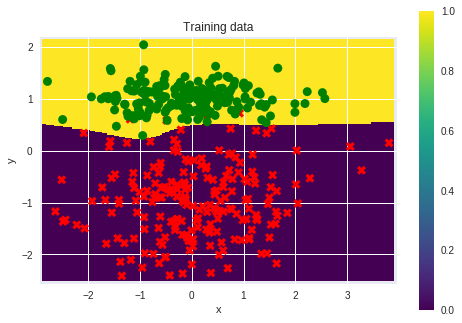

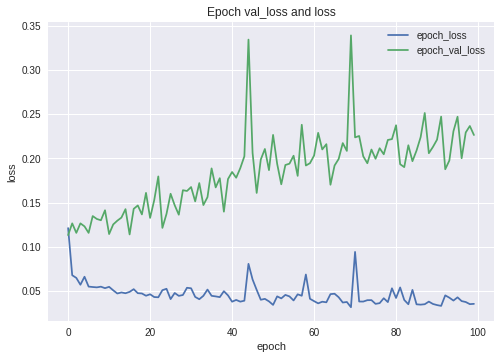

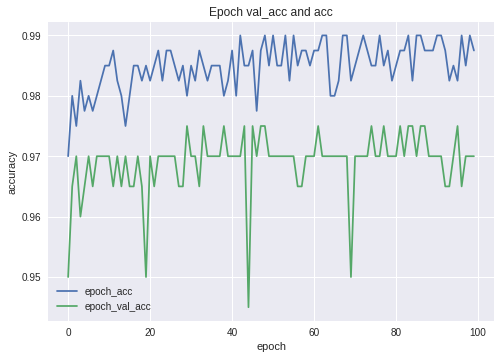


Avg. validation accuracy:0.97


In [19]:
X_train, y, model=run_keras_2d("3", [Dense(input_dim=2, units=200, activation='relu'),\
             Dense(units=200, activation='relu'),\
             Dense(units=2, activation="softmax")], 100, split=0.25, display=True, verbose=True, trials=1)



In [22]:
X_train, y, model=run_keras_2d("3class",archs(3)[0], 10, split=0.5, display=False, verbose=False, trials=5)


Keras FC: dataset= 3class
Loading X (800, 2) y (800,) classes {0.0, 1.0, 2.0}

Loss on validation set:0.37580104152453714 Accuracy on validation set: 0.8975

Loss on validation set:0.3980204207263887 Accuracy on validation set: 0.8925

Loss on validation set:0.3947797438420821 Accuracy on validation set: 0.89

Loss on validation set:0.38497665359871464 Accuracy on validation set: 0.895

Loss on validation set:0.43127132682595404 Accuracy on validation set: 0.8825

Avg. validation accuracy:0.8915000000000001


In [23]:
X_train, y, model=run_keras_2d("3class",archs(3)[1], 10, split=0.5, display=False, verbose=False, trials=5)


Keras FC: dataset= 3class
Loading X (800, 2) y (800,) classes {0.0, 1.0, 2.0}

Loss on validation set:0.19425822995934594 Accuracy on validation set: 0.93

Loss on validation set:0.18095577861745638 Accuracy on validation set: 0.9425

Loss on validation set:0.1841980099960631 Accuracy on validation set: 0.94

Loss on validation set:0.18057322938599554 Accuracy on validation set: 0.9325

Loss on validation set:0.1741165961263575 Accuracy on validation set: 0.9475

Avg. validation accuracy:0.9385


In [24]:
X_train, y, model=run_keras_2d("3class",archs(3)[2], 10, split=0.5, display=False, verbose=False, trials=5)


Keras FC: dataset= 3class
Loading X (800, 2) y (800,) classes {0.0, 1.0, 2.0}

Loss on validation set:0.1440884950258268 Accuracy on validation set: 0.9575

Loss on validation set:0.15587048970753137 Accuracy on validation set: 0.9475

Loss on validation set:0.15045232152040244 Accuracy on validation set: 0.9475

Loss on validation set:0.1533177834802728 Accuracy on validation set: 0.945

Loss on validation set:0.14883993604469434 Accuracy on validation set: 0.9525

Avg. validation accuracy:0.95


In [25]:
X_train, y, model=run_keras_2d("3class",archs(3)[3], 10, split=0.5, display=False, verbose=False, trials=5)


Keras FC: dataset= 3class
Loading X (800, 2) y (800,) classes {0.0, 1.0, 2.0}

Loss on validation set:0.142916172365197 Accuracy on validation set: 0.9575

Loss on validation set:0.13673068349145695 Accuracy on validation set: 0.9525

Loss on validation set:0.13630020045745384 Accuracy on validation set: 0.9575

Loss on validation set:0.14101611332239244 Accuracy on validation set: 0.96

Loss on validation set:0.14030548646441987 Accuracy on validation set: 0.955

Avg. validation accuracy:0.9564999999999999


In [26]:
X_train, y, model=run_keras_2d("3class",archs(3)[4], 10, split=0.5, display=False, verbose=False, trials=5)


Keras FC: dataset= 3class
Loading X (800, 2) y (800,) classes {0.0, 1.0, 2.0}

Loss on validation set:0.20895454745500308 Accuracy on validation set: 0.9425

Loss on validation set:0.1793179938930818 Accuracy on validation set: 0.9525

Loss on validation set:0.20870531987995267 Accuracy on validation set: 0.9525

Loss on validation set:0.1976152191465852 Accuracy on validation set: 0.955

Loss on validation set:0.2039231977829474 Accuracy on validation set: 0.9525

Avg. validation accuracy:0.951


Keras FC: dataset= 3class
Loading X (800, 2) y (800,) classes {0.0, 1.0, 2.0}
Train on 600 samples, validate on 200 samples
Epoch 1/10
600/600 [==============================] - 8s 13ms/step - loss: 1.9456 - acc: 0.0350 - val_loss: 1.5078 - val_acc: 0.0350
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 1.2304 - acc: 0.1667 - val_loss: 0.9616 - val_acc: 0.3850
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.8367 - acc: 0.8050 - val_loss: 0.6907 - val_acc: 0.9000
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.6379 - acc: 0.9017 - val_loss: 0.5484 - val_acc: 0.9300
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.5286 - acc: 0.9100 - val_loss: 0.4639 - val_acc: 0.9300
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.4626 - acc: 0.9100 - val_loss: 0.4089 - val_acc: 0.9250
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.4199 - 

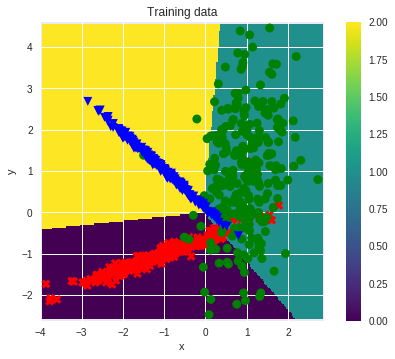

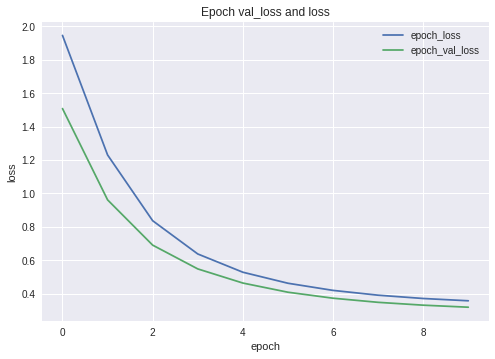

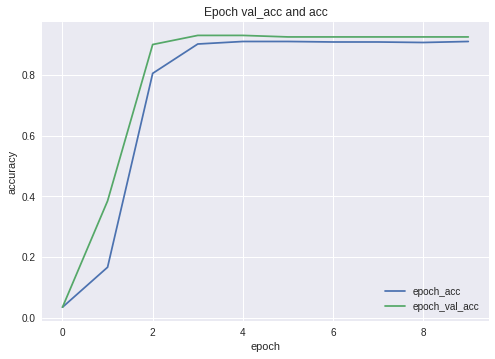


Avg. validation accuracy:0.925


In [27]:
np.random.seed(0)
layer=archs(3)[0]
X_train, y, model=run_keras_2d("3class", layer, 10, display=True, split=0.25, verbose=True, trials=1)

In [0]:
weight=model.layers[0].get_weights()

In [42]:
z=[[-1,0], [1,0], [0,-11], [0,1], [-1,-1], [-1,1], [1,1], [1,-1]]
for zi in z:
  predict=
weight[0].shape

(2, 3)

In [0]:
prediction=model.predict(z)

In [52]:
prediction.shape

(8, 3)

In [53]:
np.argmax(prediction,axis=1)

array([2, 1, 0, 2, 0, 2, 1, 1])

In [46]:
z=np.array([[-1,0], [1,0], [0,-11], [0,1], [-1,-1], [-1,1], [1,1], [1,-1]])
weight[0].T@z[0]+weight[1]

array([ 0.57703805, -1.52869733,  0.79963088])

# Weight sharing (OPTIONAL)

** Note: You can click the arrow on the left of this text block to collapse/expand this optional section and all its code blocks **

In the lab we designed a CNN that can count the number of objects in 1 dimensional images, where each black pixel is represented by a value of 0 and each white pixel is represented by a value of 1. Recall that an object is a consecutive sequence of black pixels ($0$'s). For example, the sequence $0100110$ contains three objects. 

Here we want to see how hard/easy it is to train such a network from data.  Our network architecture will be as follows: 

* The first layer is convolutional and you will implement it using the Keras `Conv1D` function, with a kernel of size 2 and stride of 1 with ReLu activation.

* The second layer is a fully connected `Dense` layer which has a scalar output. 

Here is sample usage of the `Conv1D` and`Dense` layers. 

`layer1=keras.layers.Conv1D(filters=?, kernel_size=?, strides=?,use_bias=False, activation=?, batch_size=1, input_shape=?, padding='same')`

`Dense(units=?, activation=?, use_bias=False)`

You need to fill in the parameters marked with `?` based on the problem specifications. Note also that in Keras, depending on your implementation, you may be forced to use *three* layers to implement such a network, where one intermediary `Flatten` layer is used to flatten the output of the convolutional layer, before being passed to the dense layer.

Refer to the <a href="https://keras.io/layers/convolutional/">Conv 1D</a>, <a href="https://keras.io/layers/core/">Dense</a> and <a href="https://keras.io/layers/core/#flatten">Flatten</a> descriptions in the Keras documentation to see the available parameter options.

In this exercise, we fix the structure and want to learn the best combination of weights from data. In the homework code, we have provided functions `train_neural_counter` and `get_image_data_1d`. You can use them to generate data and train the above neural network in Keras to answer the following questions. We assume that the images in our data set are randomly generated. The probability of a pixel being white is $0.1$. We work with mean squared error as the loss function for this problem. We have provided template code which you can fill in, to perform the training.

<b>4A)</b> We call a $2\times 1$ filter an *edge detector* if it has weights $[-1,1]$ or $[1,-1]$ (i.e., it can detect a left or right edge in a given image). We call it an *averaging filter* if takes average of nearby pixels. 

Assuming that the second layer in our network is the sum function (i.e., all of its weights are equal to 1), which of the following filters gives a (nearly) local minima? You may assume that we are working with $1024\times 1$ images. 

(Although you can answer the question without any coding, you may also empirically verify your claims. The function `set_weights` that can be applied to keras layers might be useful.)

<b>4B)</b> What is (approximately) the expected loss of the network on $1024\times 1$ images if the convolutional layer is an averaging filter and second layer is the sum function (without a bias term)? (Note that you can answer the question theoretically or through coding, depending on your preference.)

In [0]:
from keras.models import Sequential

In [0]:
# Code template if you would like to check 4B) through code

imsize = 1024
prob_white = 0.1

num_filters = None  # Your code
kernel_size = None  # Your code
strides = None  # Your code
activation_conv = None  # Your code

(X_train,Y_train,X_val,Y_val,X_test,Y_test) = get_image_data_1d(1000,imsize,prob_white)

layer1=keras.layers.Conv1D(filters=num_filters, kernel_size=kernel_size, \
       strides=strides, use_bias=False, activation=activation_conv, batch_size=1, input_shape=(imsize,1), padding='same')

activation_dense = None  # Your code
num_units = None  # Your code
layer3=Dense(units=num_units, activation=activation_dense, use_bias=False)

layers=[layer1,Flatten(),layer3]

# This is how we create the model using our layers
model=Sequential()
for layer in layers:
    model.add(layer)
        
model.compile(loss='mse', optimizer=Adam()) 

# Set the weights of the layers to desired values
# We give you the lines to use for this part
model.layers[0].set_weights([np.array([1/2,1/2]).reshape(2,1,1)])
model.layers[-1].set_weights([np.ones(imsize).reshape(imsize,1)])

model.evaluate(X_test,Y_test)

Instructions for updating:
Colocations handled automatically by placer.
1000/1000 [==============================] - 0s 164us/step


102.36525

<b>4C)</b> Now suppose we add a bias term of $-10$ to the last layer. What is (approximately) the expected quadratic loss? (Note that you can answer the question theoretically or through coding, depending on your preference.)

In [0]:
# Edit code from 4B) with the bias

<b>4D)</b> Averaging type filters are abundant and form a nearly flat valley of local minima for this problem. It is difficult for the network to find alternative solutions on its own. We need to force our way out of these bad minima and towards a better solution, i.e., an edge detector. To force the first layer to behave as an edge detector, we need to choose a proper **kernel regularizer**. Consider the following functions

$f_1=\sum_i |w_i|$, $f_2=\sum_i |w_i^2|$, $f_3=|\sum_{i} w_i|$. Which one of the choices is likely to guide the network to find an edge detector at the convolution layer?


<a href="https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Spring/courseware/Week8/week8_homework/">Refer to Catsoop.</a>

Implement your choice of regularizers from above in the code (complete the function `filter_reg`). Do not allow any bias in the layers for the rest of the problem. The code generates some random test and training data sets and trains the model on these data. Run a few learning trials (5 or more) for each data set and answer the following questions based on the performance of your model.

**IMPORTANT**: When implementing `filter_reg`, you should use the keras backend operations, imported as "K" in the code. So for example, `K.sum` and `K.abs`, rather than `np.sum` and `np.abs`. This is because the `weights` argument is NOT a numpy object, but rather an internal Keras object!

In [0]:
# Implement filter_reg

def filter_reg(weights):
    # We scale the output of the filter by lam
    lam=1000
    filter_result = None  # Your code
    return lam * filter_result

<b>4E)</b> For $1024\times 1$ images and training set of size $1000$, is the network **without any regularization** likely to find models that have a mean square error lower than 8 on the test data?

In [0]:
# Code template if you would like to check 4B) through code

imsize = 1024
prob_white = 0.1

data=get_image_data_1d(1000, imsize, prob_white)
trials=5
for trial in range(trials):
  
    num_filters = None  # Your code
    kernel_size = None  # Your code
    strides = None  # Your code
    activation_conv = None  # Your code

    layer1=keras.layers.Conv1D(filters=num_filters, kernel_size=kernel_size, \
    strides=strides, use_bias=False, activation=activation_conv, batch_size=1, \
    input_shape=(imsize,1),padding='same')
    
    activation_dense = None  # Your code
    num_units = None  # Your code

    layer3=Dense(units=num_units, activation=activation_dense, use_bias=False)
    
    layers=[layer1,Flatten(),layer3]
    model,err = train_neural_counter(layers, data, 'mse')
    
    model.layers[0].get_weights()[0]
    np.mean(model.layers[-1].get_weights()[0])
    print(err)

#### For parts F) to J), simply edit your code from E) with the necessary changes.

<b>4F)</b> Repeat the same experiment, but now with the regularizer you implemented. Try different regularization parameters. Which choice of regularization parameter gives the best prediction results?

In [0]:
# Edit code from 4E), using your filter as the kernel_regularizer in the Conv1D layer

<b>4G)</b> With the above choice of regularization parameter, what is the mean square error of the best network that you find on the test data? Try a few trials (5 or more) for each data test and report the value of the best network. 



#### We expect the training to be easier when there are fewer parameters to learn. Consider images of size $128\times 1$ for the rest of the problem.

<b>4H)</b> Instead of resorting to regularization again, we may instead find a way to reduce the number of parameters. What additional layer can you add to the output of the convolution layer to reduce the number of parameters to be learned without losing any relevant information?

<a href="https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Spring/courseware/Week8/week8_homework/">Refer to Catsoop.</a>

<b>4I)</b> Add the layer you suggested above to your network and run some tests with data sets of size 1000 on $128\times 1$ images.  How many parameters are left to learn with the new structure?

<b>4J)</b> Mark your observations on the two structures (not using regularization).
<a href="https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Spring/courseware/Week8/week8_homework/">Refer to Catsoop.</a>

# 5) MNIST (Digit Classification)

In this section, we'll be looking at the MNIST data set seen already in problem 2. This time, we look at the *complete* MNIST problem where our networks will take an image of *any* digit from $0-9$ as input (recall that problem 2 only looked at digits $0$ and $1$) and try to predict that digit. Also, we will now use out-of-the-box neural network implementations using Keras and Tensorflow. State-of-the-art systems have error rates of less that one half of one percent on this data set (see <a href="http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354">this list</a>).  We'll be happy with an error rate less than 2% since we don't have all year...
<br>

You can access the MNIST data for this problem using:
<br><code>train, validation = get_MNIST_data()</code>
<br>

You can run the fully connected MNIST model, using:
<br><code>run_keras_fc_mnist(train, validation, layers, epochs, split=0.1, trials=5)</code>
<br>

And, you can run the CNN MNIST test, using:
<br><code>run_keras_cnn_mnist(train, validation, layers, epochs, split=0.1, trials=5)</code>
<br>

For all following experiments, please run for 5 trials (use `trials=5`) and report the average accuracy.
<br>

A word of warning, if you have a machine with a single core and/or very little RAM, you'll be better off running on an Athena workstation. If your solutions are not being accepted, and you are confident in your approach, try with more trials. Also, 
<br>

You will need to design your own `layers` to feed to `run_keras_fc_mnist` and `run_keras_cnn_mnist`, which will be different than the ones specified by `archs()`. For instance, `layers=[Dense(input_dim=64, units=4, activation="softmax")]` defines a single layer with 64 inputs, 4 output units, and softmax activation. Also, we advise you to use the option `verbose=True` when unsure about the progress made during training of your models.
<br>

<b> 5A)</b> Look at the code and indicate what the difference is between <code>run_keras_fc_mnist</code> and <code>run_keras_cnn_mnist</code>? <a href="https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Spring/courseware/Week8/week8_homework/">Refer to Catsoop.</a>

In [0]:
def run_keras_fc_mnist(train, test, layers, epochs, split=0.1, verbose=True, trials=1):
    (X_train, y1), (X_val, y2) = train, test
    # Flatten the images
    m = X_train.shape[1]
    X_train = X_train.reshape((X_train.shape[0], m*m))
    X_val = X_val.reshape((X_val.shape[0], m*m))
    # Categorize the labels
    num_classes = 10
    y_train = np_utils.to_categorical(y1, num_classes)
    y_val = np_utils.to_categorical(y2, num_classes)
    # Train, use split for validation
    val_acc, test_acc = 0, 0
    for trial in range(trials):
        # Reset the weights
        # See https://github.com/keras-team/keras/issues/341
        session = K.get_session()
        for layer in layers:
            for v in layer.__dict__:
                v_arg = getattr(layer, v)
                if hasattr(v_arg, 'initializer'):
                    initializer_func = getattr(v_arg, 'initializer')
                    initializer_func.run(session=session)
        # Run the model
        model, history, vacc, tacc = \
                run_keras(X_train, y_train, X_val, y_val, None, None, layers, epochs, split=split, verbose=verbose)
        val_acc += vacc if vacc else 0
        test_acc += tacc if tacc else 0
    if val_acc:
        print ("\nAvg. validation accuracy:"  + str(val_acc/trials))
    if test_acc:
        print ("\nAvg. test accuracy:"  + str(test_acc/trials))

def run_keras_cnn_mnist(train, test, layers, epochs, split=0.1, verbose=True, trials=1):
    # Load the dataset
    (X_train, y1), (X_val, y2) = train, test
    # Add a final dimension indicating the number of channels (only 1 here)
    m = X_train.shape[1]
    X_train = X_train.reshape((X_train.shape[0], m, m, 1))
    X_val = X_val.reshape((X_val.shape[0], m, m, 1))
    # Categorize the labels
    num_classes = 10
    y_train = np_utils.to_categorical(y1, num_classes)
    y_val = np_utils.to_categorical(y2, num_classes)
    # Train, use split for validation
    val_acc, test_acc = 0, 0
    for trial in range(trials):
        # Reset the weights
        # See https://github.com/keras-team/keras/issues/341
        session = K.get_session()
        for layer in layers:
            for v in layer.__dict__:
                v_arg = getattr(layer, v)
                if hasattr(v_arg, 'initializer'):
                    initializer_func = getattr(v_arg, 'initializer')
                    initializer_func.run(session=session)
        # Run the model
        model, history, vacc, tacc = \
                run_keras(X_train, y_train, X_val, y_val, None, None, layers, epochs, split=split, verbose=verbose)
        val_acc += vacc if vacc else 0
        test_acc += tacc if tacc else 0
    if val_acc:
        print ("\nAvg. validation accuracy:"  + str(val_acc/trials))
    if test_acc:
        print ("\nAvg. test accuracy:"  + str(test_acc/trials))

<b> 5B)</b> Using one epoch of training, what is the accuracy of a network **with no hidden units** (using the <code>run_keras_fc_mnist</code> method) on this data? Hint: this is expected to be terrible. If it's still not working, run for more trials. Remember to use 10 output units (the network predicts a digit from 0-9) and softmax activation!



In [55]:
layers = [Dense(input_dim=784, units=10, activation="softmax")]  # Your code
train, validation = get_MNIST_data()
run_keras_fc_mnist(train, validation, layers, 1, split=0.1, verbose=True, trials=10)

11493376/11490434 [==============================] - 0s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 13s 220us/step - loss: 7.3552 - acc: 0.5378 - val_loss: 6.2711 - val_acc: 0.6081

Loss on validation set:6.271083640289307 Accuracy on validation set: 0.6081
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 13s 217us/step - loss: 8.5004 - acc: 0.4671 - val_loss: 7.5803 - val_acc: 0.5270

Loss on validation set:7.580250917053223 Accuracy on validation set: 0.527
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 13s 223us/step - loss: 6.7111 - acc: 0.5786 - val_loss: 5.6738 - val_acc: 0.6447

Loss on validation set:5.673832307052613 Accuracy on validation set: 0.6447
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 13s 221us/step - loss: 10.6255 - a

<b> 5C)</b> When creating the keras layer, pass in the following argument to Dense:
<code>kernel_initializer=VarianceScaling(scale=0.001, mode='fan_in', distribution='normal', seed=None)</code> and repeat the test.  What is the accuracy now?


In [95]:
layers = [Dense(input_dim=784, units=10, activation="softmax",\
          kernel_initializer=VarianceScaling(scale=0.001, mode='fan_in', distribution='normal', seed=None))]  # Your code
train, validation = get_MNIST_data()
run_keras_fc_mnist(train, validation, layers, 1, split=0.1, verbose=True, trials=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 15s 252us/step - loss: 6.8316 - acc: 0.5686 - val_loss: 5.7266 - val_acc: 0.6418

Loss on validation set:5.726605661010742 Accuracy on validation set: 0.6418
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 15s 246us/step - loss: 3.6564 - acc: 0.7598 - val_loss: 3.3125 - val_acc: 0.7870

Loss on validation set:3.312474801635742 Accuracy on validation set: 0.787
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 15s 244us/step - loss: 6.0079 - acc: 0.6177 - val_loss: 5.8303 - val_acc: 0.6344

Loss on validation set:5.830264462280273 Accuracy on validation set: 0.6344
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 15s 244us/step - loss: 4.6595 - acc: 0.6998 - val_loss: 4.2099 - val_acc: 0.7346

Loss on validatio

<b> 5D)</b> Now, linearly scale the data so that the pixel values are between 0 and 1 and repeat your test with the original layer (no VarianceScaling). What is the accuracy now?

In [110]:
layers = [Dense(input_dim=784, units=10, activation="softmax")]  # Your code
train, validation = get_MNIST_data()

# Scale the images
train2 =(train[0]/255.,train[1])  # Your code
validation2 = (validation[0]/255,validation[1])  # Your code

run_keras_fc_mnist(train2, validation2, layers, 1, split=0.1, verbose=True, trials=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 16s 265us/step - loss: 0.4667 - acc: 0.8793 - val_loss: 0.3078 - val_acc: 0.9151

Loss on validation set:0.3077592942535877 Accuracy on validation set: 0.9151
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 15s 256us/step - loss: 0.4690 - acc: 0.8778 - val_loss: 0.3173 - val_acc: 0.9107

Loss on validation set:0.31729373716712 Accuracy on validation set: 0.9107
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 16s 261us/step - loss: 0.4679 - acc: 0.8768 - val_loss: 0.3081 - val_acc: 0.9136

Loss on validation set:0.3080778224647045 Accuracy on validation set: 0.9136
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 16s 260us/step - loss: 0.4746 - acc: 0.8745 - val_loss: 0.3104 - val_acc: 0.9138

Loss on validat

In [109]:
train2[0][1]

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.51, 1.59, 2.53, 1.59, 0.5 , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0. 

<b> 5E)</b> What is happening? <a href="https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Spring/courseware/Week8/week8_homework/">Refer to Catsoop.</a>


### Important: <b>Always scale the data like in 5D) for subsequent problems.</b>


<b> 5F)</b> Using this same architecture, evaluate validation accuracy for number of training epochs in [5, 10, 15].

In [114]:
train, validation = get_MNIST_data()

# Scale the images
train2 =(train[0]/255.,train[1])  # Your code
validation2 = (validation[0]/255,validation[1])  # Your code

for epochs in [5,10,15]:
    layers = [Dense(input_dim=784, units=10, activation="softmax")]  # Your code
    run_keras_fc_mnist(train2, validation2, layers, epochs, split=0.1, verbose=False, trials=5)


Loss on validation set:0.2697895421296358 Accuracy on validation set: 0.9252

Loss on validation set:0.27193705541193486 Accuracy on validation set: 0.9257

Loss on validation set:0.26653761529624465 Accuracy on validation set: 0.9264

Loss on validation set:0.2669355450749397 Accuracy on validation set: 0.926

Loss on validation set:0.2646467423021793 Accuracy on validation set: 0.9265

Avg. validation accuracy:0.9259600000000001

Loss on validation set:0.2661864712908864 Accuracy on validation set: 0.9272

Loss on validation set:0.26212519440054893 Accuracy on validation set: 0.9276

Loss on validation set:0.2663315407693386 Accuracy on validation set: 0.9258

Loss on validation set:0.2689012592703104 Accuracy on validation set: 0.9267

Loss on validation set:0.26332459056675434 Accuracy on validation set: 0.9291

Avg. validation accuracy:0.92728

Loss on validation set:0.2670408170968294 Accuracy on validation set: 0.9272

Loss on validation set:0.2674353663176298 Accuracy on valid

<b> 5G)</b> 

<b> 5G a)</b>With the validation accuracy that you just saw on per digit basis using $15$ epochs, and assuming each digit is read independently from the others, what is the probability of reading a 5 digit zip code correctly?<br>

<b> 5G b)</b>Now, assume that the accuracy is 0.9985, what is the probability of reading a zip code correctly?<br>
b.

This is why people care about dropping the error rates to what at first sound like ridiculous values.

<a href="https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Spring/courseware/Week8/week8_homework/">Refer to Catsoop.</a>

<b> 5H)</b> Using one epoch of training, try a single hidden layer with ReLU and gradually increase the units (128, 256, 512, 1024) units.  What are the accuracies?

In [115]:
train, validation = get_MNIST_data()

# Scale the images
train2 =(train[0]/255.,train[1])  # Your code
validation2 = (validation[0]/255,validation[1])  # Your code


for num in [128,256,512,1024]:
    layers = [Dense(input_dim=784, units=num, activation='relu'),\
             Dense(units=10, activation="softmax")]  # Your code
    run_keras_fc_mnist(train2, validation2, layers, 1, split=0.1, verbose=True, trials=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1


KeyboardInterrupt: ignored

<b> 5I)</b> Now, try a network with two layers, again using one epoch, with 512 units in the first hidden layer and and 256 units in the second hidden layer.  What is the accuracy?

In [116]:
train, validation = get_MNIST_data()

# Scale the images
train2 =(train[0]/255.,train[1])  # Your code
validation2 = (validation[0]/255,validation[1])  # Your code

layers = [Dense(input_dim=784, units=512, activation='relu'),\
             Dense(units=256, activation='relu'),\
             Dense(units=10, activation="softmax")]  # Your code
run_keras_fc_mnist(train2, validation2, layers, 1, split=0.1, verbose=False, trials=5)


Loss on validation set:0.10872747318260371 Accuracy on validation set: 0.9663

Loss on validation set:0.09849569575996138 Accuracy on validation set: 0.9697

Loss on validation set:0.08107373610874638 Accuracy on validation set: 0.9738

Loss on validation set:0.09131545753749087 Accuracy on validation set: 0.9719

Loss on validation set:0.1170585597563535 Accuracy on validation set: 0.9626

Avg. validation accuracy:0.9688599999999999


<b> 5J)</b> Build a convolutional network with the following structure:

<ul>
<li> A convolutional layer with 32 filters of size 3 × 3, with a ReLU activation
<li> A max pooling layer with size 2 × 2
<li> A convolutional layer with 64 filters of size 3 × 3, with ReLU activation
<li> A max pooling layer with size 2 × 2
<li> A flatten layer
<li> A fully connected layer with 128 neurons, with ReLU activation
<li> A dropout layer with drop probability 0.5
<li> A fully-connected layer with 10 neurons with softmax
</ul>
Train it on MNIST for one epoch, using <code>run_keras_cnn_mnist</code>.  What is the accuracy on the validation set?

If you have time to run the training for more epochs, try it, you should see improvement.


In [121]:
train, validation = get_MNIST_data()

# Scale the images
train2 =(train[0]/255.,train[1])  # Your code
validation2 = (validation[0]/255,validation[1])  # Your code

layers = [Conv2D(filters=32, kernel_size=(3,3),strides=1, padding='valid', activation='relu'),\
          MaxPooling2D(pool_size=(2, 2), padding='valid'),\
          Conv2D(filters=64, kernel_size=(3,3),strides=1, padding='valid', activation='relu'),\
          MaxPooling2D(pool_size=(2, 2),padding='valid'),\
          Flatten(),\
          Dense(input_dim=784, units=128, activation='relu'),\
          Dropout(rate=0.5),\
          Dense(units=10, activation="softmax")]  # Your code  # Your code

run_keras_cnn_mnist(train2, validation2, layers, 1, split=0.1, verbose=False, trials=5)


Loss on validation set:0.04111385222440003 Accuracy on validation set: 0.9867

Loss on validation set:0.05111614862738643 Accuracy on validation set: 0.9831

Loss on validation set:0.05460453747764695 Accuracy on validation set: 0.9823

Loss on validation set:0.04390376804274274 Accuracy on validation set: 0.986

Loss on validation set:0.048305233104340733 Accuracy on validation set: 0.9838

Avg. validation accuracy:0.9843799999999998


<b> 5K)</b> Now, let's compare the performance of a fully connected model and a CNN on data where the characters have been shifted randomly so that they are no longer centered.  

You can build such a data set by calling: <code>train_20, validation_20 = get_MNIST_data(shift=20)</code>. Remember to scale it appropriately.

<b>Note that each image is now 48x48, so you will need to change your layer definitions</b>.
Run your two-hidden-layer FC architecture from above (problem 5I) on this data and then run the CNN architecture from above (problem 5J), both for one epoch. Report your results.


In [118]:
train_20, validation_20 = get_MNIST_data(shift=20) # Your code (fill in the shift)

# Scale the images
train_20 = (train_20[0]/255., train_20[1])  # Your code
validation_20 = (validation_20[0]/255., validation_20[1])  # Your code

layers_fc = [Dense(input_dim=2304, units=512, activation='relu'),\
             Dense(units=256, activation='relu'),\
             Dense(units=10, activation="softmax")]  # Your code

run_keras_fc_mnist(train_20, validation_20, layers_fc, 1, split=0.1, verbose=True, trials=5)

layers_cnn = [Conv2D(filters=32, kernel_size=(3,3),activation='relu'),\
          MaxPooling2D(pool_size=(2, 2)),\
          Conv2D(filters=64, kernel_size=(3,3),activation='relu'),\
          MaxPooling2D(pool_size=(2, 2)),\
          Flatten(),\
          Dense(units=2304, activation='relu'),\
          Dropout(rate=0.5),\
          Dense(units=10, activation="softmax")]# Your code

run_keras_cnn_mnist(train_20, validation_20, layers_cnn, 1, split=0.1, verbose=True, trials=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 29s 484us/step - loss: 0.7522 - acc: 0.7526 - val_loss: 0.4040 - val_acc: 0.8725

Loss on validation set:0.40399787731170655 Accuracy on validation set: 0.8725
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 29s 491us/step - loss: 0.7478 - acc: 0.7544 - val_loss: 0.4139 - val_acc: 0.8685

Loss on validation set:0.4138757236480713 Accuracy on validation set: 0.8685
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 30s 499us/step - loss: 0.7486 - acc: 0.7541 - val_loss: 0.3900 - val_acc: 0.8759

Loss on validation set:0.39002202274799347 Accuracy on validation set: 0.8759
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 30s 502us/step - loss: 0.7524 - acc: 0.7517 - val_loss: 0.3958 - val_acc: 0.8763

Loss on val

KeyboardInterrupt: ignored

<b> 5L)</b> Some possible conclusions. <a href="https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Spring/courseware/Week8/week8_homework/">Refer to Catsoop.</a>